In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/telecom_churn.csv'
df = pd.read_csv(url)

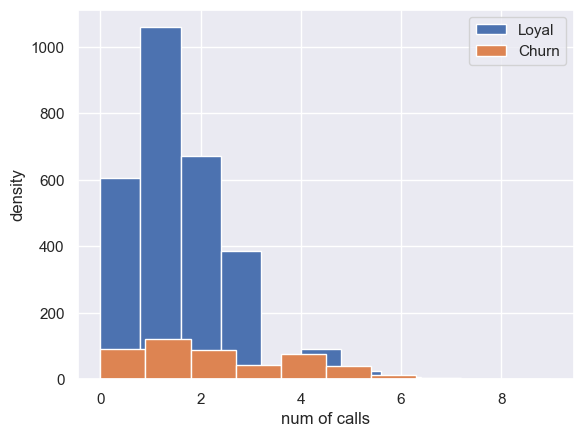

In [6]:
df.loc[df.Churn == False, 'Customer service calls'].hist(label='Loyal')
df.loc[df.Churn == True, 'Customer service calls'].hist(label='Churn')
plt.xlabel('num of calls')
plt.ylabel('density')
plt.legend()

augmentation - bootstaping (random sampling)

In [10]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100*alpha/2.0, 100*(1-alpha/2.0)])
    return boundaries


loyal_calls = df.loc[df.Churn == False, 'Customer service calls'].values
churn_calls = df.loc[df.Churn == True, 'Customer service calls'].values

loyal_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(loyal_calls, 1000)
]

churn_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(churn_calls, 1000)
]

print(stat_intervals(loyal_mean_scores, 0.05))
print(stat_intervals(churn_mean_scores, 0.05))

[1.40911404 1.49263158]
[2.0621118  2.40993789]


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/telecom_churn.csv'
df = pd.read_csv(url)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [18]:
cols = []
for i in df.columns:
    if ((df[i].dtype == 'float64') or (df[i].dtype == 'int64')):
        cols.append(i)

X, y = df[cols].copy(), np.asarray(df.Churn, dtype='int8')
skf = StratifiedKFold(n_splits=5, shuffle=True)
rfc = RandomForestClassifier(n_jobs=-1)

results = cross_val_score(rfc, X, y, cv=skf)
results, round(results.mean()*100, 2)

(array([0.92803598, 0.92353823, 0.93403298, 0.91291291, 0.92792793]), 92.53)

In [19]:
params = {
    'max_features': [4,7,10,13],
    'min_samples_leaf': [1,3,5,7],
    'max_depth': [5,10,15,20]
}
rfc = RandomForestClassifier(n_jobs=-1)
gcv = GridSearchCV(rfc, params, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X,y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [21]:
gcv.best_params_, gcv.best_score_

({'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 1},
 0.9276929103016058)

In [22]:
from sklearn.ensemble import RandomForestRegressor

url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/hostel_factors.csv'
df = pd.read_csv(url)
df.head()

,hostel,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,rating
0,hostel1,0.675000,0.100000,0.300000,0.875000,0.250000,0.425000,0.350000,0.725000,0.400000,0.275000,9.0
1,hostel2,0.500000,0.000000,0.058824,0.573529,0.117647,0.382353,0.000000,0.161765,0.308824,0.000000,8.3
2,hostel3,0.520833,0.041667,0.020833,0.666667,0.229167,0.437500,0.270833,0.250000,0.395833,0.270833,8.6
3,hostel4,0.692308,0.038462,0.038462,0.346154,0.076923,0.307692,0.500000,0.115385,0.153846,0.269231,7.6
4,hostel5,0.620690,0.000000,0.000000,0.517241,0.172414,0.344828,0.172414,0.379310,0.103448,0.310345,8.7


1. Staff 0.188029 
2. Value for money 0.139572 
3. Extra services 0.118213 
4. Shared space condition 0.118103 
5. Customer Co-creation 0.116060 
6. General conditions & conveniences 0.095754 
7. Shared kitchen condition 0.077830 
8. Hostel booking 0.059123 
9. Check-in and check-out 0.050897 
10. Room condition 0.036419 


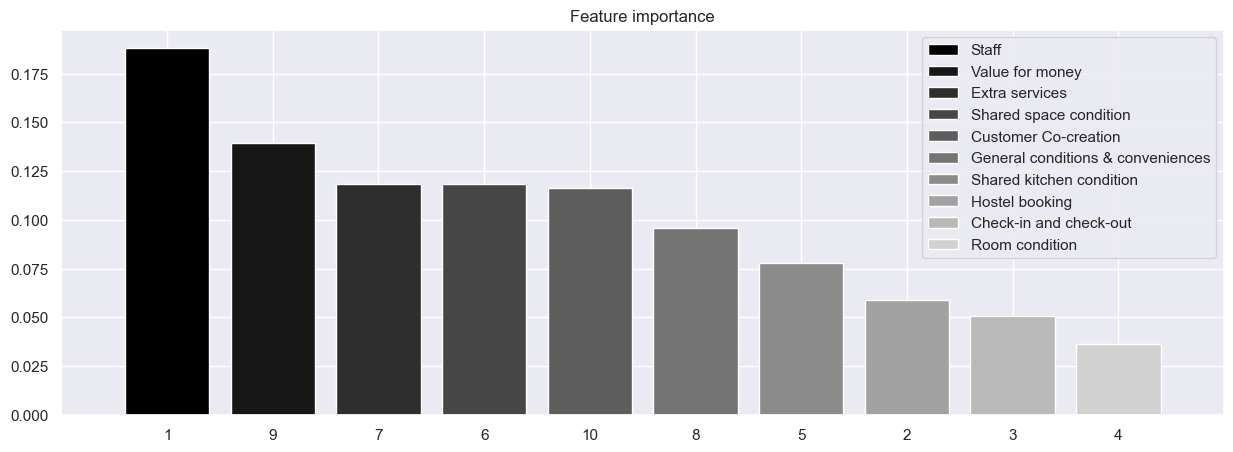

In [34]:
features = {
    "f1": u"Staff",
    "f2": u"Hostel booking",
    "f3": u"Check-in and check-out",
    "f4": u"Room condition",
    "f5": u"Shared kitchen condition",
    "f6": u"Shared space condition",
    "f7": u"Extra services",
    "f8": u"General conditions & conveniences",
    "f9": u"Value for money",
    "f10": u"Customer Co-creation",
}

rfr = RandomForestRegressor(n_estimators=1000, max_features=10)
rfr.fit(df.drop(['hostel', 'rating'], axis=1), df.rating)
importances = rfr.feature_importances_

indices = np.argsort(importances)[::-1]
num_to_plot = 10
feature_indices = [i+1 for i in indices[:num_to_plot]]

for f in range(num_to_plot):
    print('%d. %s %f ' % (f+1, features['f' + str(feature_indices[f])], importances[indices[f]]))
plt.figure(figsize=(15,5))
plt.title('Feature importance')
bars = plt.bar(
    range(num_to_plot),
    importances[indices[:num_to_plot]],
    color=([str(i / float(num_to_plot+1)) for i in range(num_to_plot)]),
)
ticks = plt.xticks(range(num_to_plot), feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, ["".join(features['f' + str(i)]) for i in feature_indices])

In [35]:
url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/credit_scoring_sample.csv'
df = pd.read_csv(url, sep=';')
df = df.fillna(df.median())
df.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,5166.0,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [37]:
df.dtypes

SeriousDlqin2yrs                          int64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
MonthlyIncome                           float64
NumberOfDependents                      float64
dtype: object

0    0.777511
1    0.222489
Name: SeriousDlqin2yrs, dtype: float64

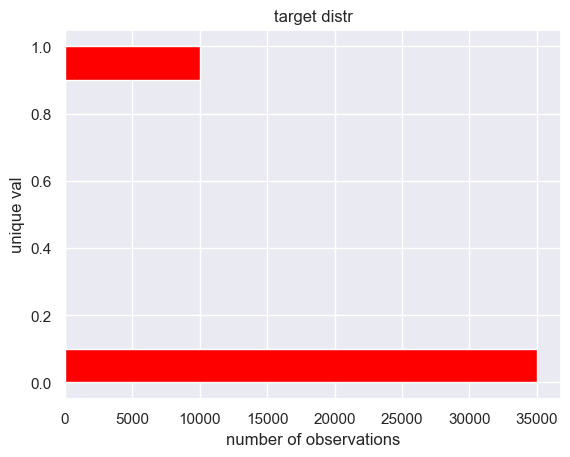

In [38]:
ax = df.SeriousDlqin2yrs.hist(orientation='horizontal', color='red')
ax.set_xlabel('number of observations')
ax.set_ylabel('unique val')
ax.set_title('target distr')

df.SeriousDlqin2yrs.value_counts() / df.shape[0]

In [40]:
independent_columns = [x for x in df if x != 'SeriousDlqin2yrs']
independent_columns

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

In [43]:
X = df[independent_columns]
y = df.SeriousDlqin2yrs

In [46]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    return boundaries


churn = df[df.SeriousDlqin2yrs == 1].age.values
churn_mean = [np.mean(sample) for sample in get_bootstrap_samples(churn, 1000)]
stat_intervals(churn_mean, 0.1)

array([45.71822262, 46.14135747])

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression(class_weight='balanced')
params = {'C': (0.0001, 0.001, 0.1, 1, 10)}
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [49]:
grid = GridSearchCV(lr, params, n_jobs=-1, scoring='roc_auc', cv=skf)
grid.fit(X,y)
grid.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced')

In [61]:
grid.cv_results_['std_test_score'][0]

0.013473827277880842

In [62]:
grid.best_score_

0.8096107641653717

In [67]:
from sklearn.preprocessing import StandardScaler

lr = LogisticRegression(C=0.001, class_weight='balanced')
scaler = StandardScaler()
lr.fit(scaler.fit_transform(X), y)

pd.DataFrame(
    {'feat': independent_columns, 'coef': lr.coef_[0]}
).sort_values('coef', ascending=False)

,feat,coef
1,NumberOfTime30-59DaysPastDueNotWorse,0.723427
3,NumberOfTimes90DaysLate,0.516788
4,NumberOfTime60-89DaysPastDueNotWorse,0.193558
6,NumberOfDependents,0.101443
2,DebtRatio,-0.024096
5,MonthlyIncome,-0.163146
0,age,-0.416702


In [71]:
exp = np.exp(lr.coef_[0])
sum = np.sum(np.exp(lr.coef_[0]))
softmax =  (exp / sum)[2]
print(lr.coef_)
print(exp)
print(sum)
print(exp/sum)
print(softmax)

[[-0.41670229  0.72342698 -0.02409605  0.51678764  0.19355764 -0.16314632
   0.1014432 ]]
[0.65921714 2.06148579 0.97619194 1.67663304 1.21355933 0.84946689
 1.10676705]
8.543321181403357
[0.0771617  0.24129794 0.11426375 0.19625073 0.14204772 0.09943052
 0.12954763]
0.11426375283065274


In [73]:
params = {
    'max_features': [1,2,4],
    'min_samples_leaf': [3,5,7,9],
    'max_depth': [5,10,10]
}
rfc = RandomForestClassifier(n_jobs=-1)
rf_grid = GridSearchCV(rfc, params, n_jobs=-1, scoring='roc_auc', cv=skf, verbose=True)
rf_grid.fit(X,y)
rf_grid.best_score_ - grid.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


0.026789943870965893

In [74]:
print(rf_grid.best_estimator_.feature_importances_)
print(np.argmin(rf_grid.best_estimator_.feature_importances_))
independent_columns[np.argmin(rf_grid.best_estimator_.feature_importances_)]

[0.08017772 0.26648431 0.06524299 0.3465071  0.17458068 0.05302934
 0.01397785]
6


'NumberOfDependents'

In [76]:
pd.DataFrame({
    'feat': independent_columns,
    'coef': rf_grid.best_estimator_.feature_importances_
}).sort_values('coef', ascending=False)

,feat,coef
3,NumberOfTimes90DaysLate,0.346507
1,NumberOfTime30-59DaysPastDueNotWorse,0.266484
4,NumberOfTime60-89DaysPastDueNotWorse,0.174581
0,age,0.080178
2,DebtRatio,0.065243
5,MonthlyIncome,0.053029
6,NumberOfDependents,0.013978


In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

params = {
    'max_features': [2,3,4],
    'max_samples': [0.5, 0.7, 0.9],
    'base_estimator__C': [0.0001, 0.001, 0.01, 1, 10, 100]
}

bg = BaggingClassifier(
    LogisticRegression(class_weight='balanced'),
    n_estimators=100,
    n_jobs=-1
)
rgrid = RandomizedSearchCV(
    bg,
    params,
    n_jobs=-1,
    scoring='roc_auc',
    cv=skf,
    n_iter=10,
    verbose=True
)
rgrid.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\serge\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:929: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=BaggingClassifier(estimator=LogisticRegression(class_weight='balanced'),
                                               n_estimators=100, n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'base_estimator__C': [0.0001, 0.001,
                                                              0.01, 1, 10,
                                                              100],
                                        'max_features': [2, 3, 4],
                                        'max_samples': [0.5, 0.7, 0.9]},
                   scoring='roc_auc', verbose=True)

In [79]:
rgrid.best_score_, rgrid.best_params_, rgrid.best_estimator_

(0.8060856093150823,
 {'max_samples': 0.7, 'max_features': 4, 'base_estimator__C': 1},
 BaggingClassifier(estimator=LogisticRegression(C=1, class_weight='balanced'),
                   max_features=4, max_samples=0.7, n_estimators=100, n_jobs=-1))